# K Nearest Neighbors (K-NN - K Vizinhos Mais Próximos)

Esta apresentação foi baseada em:
<TT>https://www.python-course.eu/k_nearest_neighbor_classifier.php</TT>

Primeiro, os devidos $\texttt{import}$s das bibliotecas usadas:

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Iremos trabalhar inicialmente com o banco de dados Iris.

In [3]:
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

Para conseguirmos visualizar os dados, escolhemos como características somente<br/>
o comprimento de sépala (primeira característica) e<br/>
a largura de pétala (quarta característica).

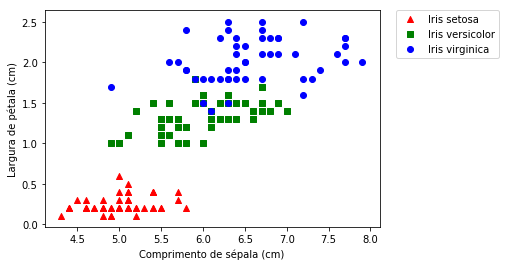

In [4]:
plt.scatter(iris_data[0:50,0], iris_data[0:50,3], c='r', marker='^', label="Iris setosa")
plt.scatter(iris_data[50:100,0], iris_data[50:100,3], c='g', marker='s', label="Iris versicolor")
plt.scatter(iris_data[100:150,0], iris_data[100:150,3], c='b', marker='o', label="Iris virginica")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Comprimento de sépala (cm)')
plt.ylabel('Largura de pétala (cm)')
plt.show()

Notamos que, usando somente as primeira e quarta características, a <font color='red'>Iris setosa</font> é linearmente separável das outras, <br>o que não ocorre com a <font color='green'>Iris versicolor</font> e <font color='blue'>Iris viginica</font>. <br>
Algo análogo ocorre no espaço 4-dimensional.

Para evitar tendências nos dados, permutaremos os índices das amostras, <br>
e já separemos os conjuntos de treinamento e de teste.

In [5]:
np.random.seed(42) # para fixar a semente do gerador pseudo-aleatório
indices = np.random.permutation(len(iris_data))

n_test_samples = 50 # número de amostras no conjunto de teste = 50 amostras

trainset_data = iris_data[indices[:-n_test_samples]] # conjunto de treinamento com 100 amostras
trainset_labels = iris_labels[indices[:-n_test_samples]]

testset_data = iris_data[indices[-n_test_samples:]] # conjunto de teste com 50 amostras
testset_labels = iris_labels[indices[-n_test_samples:]]

print('Exemplos de amostras de treinamento:\n', trainset_data[:4], trainset_labels[:4])
print('Exemplos de amostras de teste:\n', testset_data[:4], testset_labels[:4])

Exemplos de amostras de treinamento:
 [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]
Exemplos de amostras de teste:
 [[4.6 3.1 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [6.3 2.5 4.9 1.5]] [0 0 0 1]


Visualizando as amostras de treinamento:

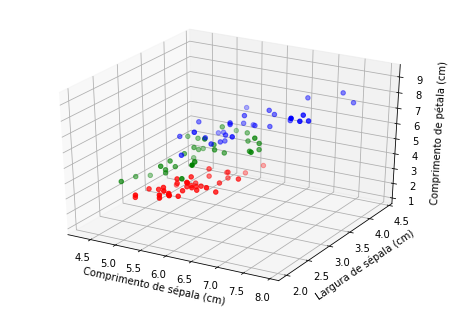

In [6]:
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(trainset_data)):
        if trainset_labels[i] == iclass:
            X[iclass][0].append(trainset_data[i][0])
            X[iclass][1].append(trainset_data[i][1])
            X[iclass][2].append(sum(trainset_data[i][2:]))
colours = ("r", "g", "b")
fig = plt.figure()
ax3 = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
    ax3.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
    ax3.set_xlabel('Comprimento de sépala (cm)')
    ax3.set_ylabel('Largura de sépala (cm)')
    ax3.set_zlabel('Comprimento de pétala (cm)')
plt.show()

Escolhemos a distância euclidiana como métrica de dissimilaridade,<br>
isto é, quanto maior a distância, menos similares serão as amostras.

In [7]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)

print('Distância entre as amostras 3 e 44 = {:1.3f} cm.'.format(distance(trainset_data[3], trainset_data[44])))

Distância entre as amostras 3 e 44 = 3.419 cm.


Escolhida a distância a ser usada, podemos proceder com o algoritmo K-NN propriamente dito.<br>
Definiremos uma função para identificar os $k$ vizinhos mais próximos de uma amostra:

In [8]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label),
    where:
    index    is the index from the training_set, 
    dist     is the distance between the test_instance 
             and the instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

Testando...

In [10]:
for i in range(5):
    neighbors = get_neighbors(trainset_data, 
                              trainset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print('i =', i,'\n',
          'Amostra de teste:', testset_data[i],
          'Classe real da amostra de teste:', testset_labels[i])
    for j in range(3):
        print('Amostra vizinha', j, ':', neighbors[j][0],'\n',
              'Distância: %.4f'% neighbors[j][1],'\n',
              'Classe:', neighbors[j][2])

i = 0 
 Amostra de teste: [4.6 3.1 1.5 0.2] Classe real da amostra de teste: 0
Amostra vizinha 0 : [4.6 3.2 1.4 0.2] 
 Distância: 0.1414 
 Classe: 0
Amostra vizinha 1 : [4.7 3.2 1.6 0.2] 
 Distância: 0.1732 
 Classe: 0
Amostra vizinha 2 : [4.8 3.1 1.6 0.2] 
 Distância: 0.2236 
 Classe: 0
i = 1 
 Amostra de teste: [5.1 3.5 1.4 0.3] Classe real da amostra de teste: 0
Amostra vizinha 0 : [5.1 3.5 1.4 0.2] 
 Distância: 0.1000 
 Classe: 0
Amostra vizinha 1 : [5.  3.5 1.3 0.3] 
 Distância: 0.1414 
 Classe: 0
Amostra vizinha 2 : [5.  3.6 1.4 0.2] 
 Distância: 0.1732 
 Classe: 0
i = 2 
 Amostra de teste: [4.4 3.  1.3 0.2] Classe real da amostra de teste: 0
Amostra vizinha 0 : [4.4 2.9 1.4 0.2] 
 Distância: 0.1414 
 Classe: 0
Amostra vizinha 1 : [4.4 3.2 1.3 0.2] 
 Distância: 0.2000 
 Classe: 0
Amostra vizinha 2 : [4.3 3.  1.1 0.1] 
 Distância: 0.2449 
 Classe: 0
i = 3 
 Amostra de teste: [6.3 2.5 4.9 1.5] Classe real da amostra de teste: 1
Amostra vizinha 0 : [6.3 2.8 5.1 1.5] 
 Distância: 0.3

Definimos agora uma função de votação: <br>
a classe mais frequente determina a classe da amostra de teste.

In [11]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

Testando...

In [12]:
for i in range(n_test_samples):
    neighbors = get_neighbors(trainset_data, 
                              trainset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    #print('i =', i, 'Amostra:', testset_data[i], 
    #      'classe estimada:', vote(neighbors), '--',
    #       testset_labels[i], '(classe real)')
    if vote(neighbors) != testset_labels[i]:
        print('i =', i, 'Amostra:', testset_data[i], 
          'classe estimada:', vote(neighbors), '--',
           testset_labels[i], '(classe real)')

i = 3 Amostra: [6.3 2.5 4.9 1.5] classe estimada: 2 -- 1 (classe real)
i = 46 Amostra: [4.9 2.5 4.5 1.7] classe estimada: 1 -- 2 (classe real)


## K-NN Ponderado

Como vimos (é claro que depende das amostras escolhidas para o teste),<br>
algumas amostras de teste podem ter sido classificadas erroneamente.<br>
Pode ter acontecido como na figura abaixo:

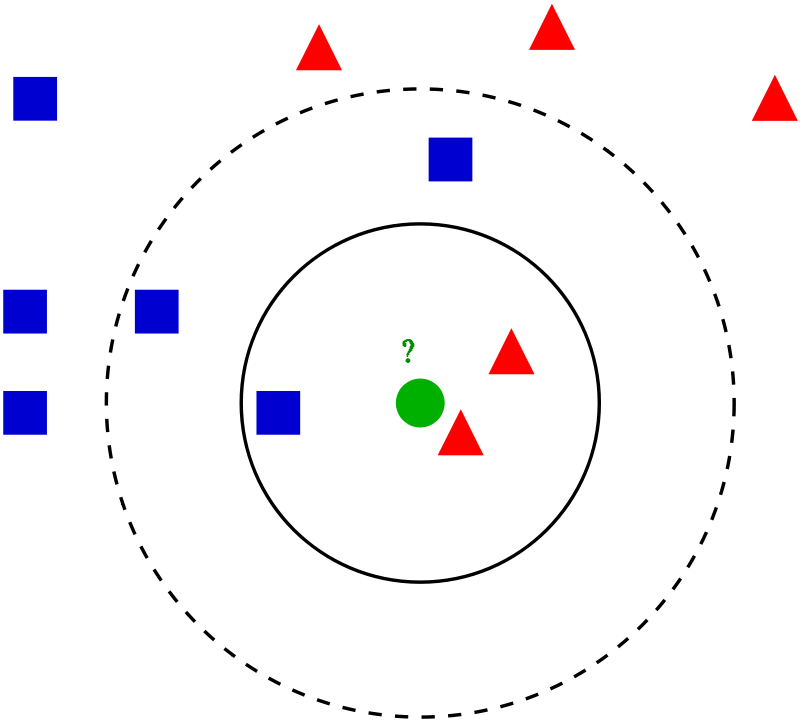

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = "/home/thelmo/uece/cursos/analise_de_dados/figuras/"
Image(filename = PATH + "k-nn.png", width=400, height=400)

Ou seja, quando $k = 5$, o número de amostras azuis ultrapassou o de vermelhas,<br>
apesar das vermelhas estarem mais próximas da amostra de teste verde.<br>
Podemos fazer uma ponderação harmônica com os vizinhos mais próximos.<br>
Isto é, se indexarmos os vizinhos da menor para a maior distância à amostra de teste,<br>
e tomarmos o inverso do índice (e.g., se $i = 2$, então $index = 1/2$),<br>
daremos mais peso aos vizinhos mais próximos.

In [14]:
def vote_harmonic_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    
    # para cada classe, somam-se os inversos de suas ordens
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

Testando...

In [16]:
for i in range(n_test_samples):
    neighbors = get_neighbors(trainset_data, 
                              trainset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    #print('i =', i, ', classe real:', testset_labels[i], 
    #      ', classe estimada:', 
    #      vote_harmonic_weights(neighbors, all_results=True))
    if testset_labels[i] != vote_harmonic_weights(neighbors, all_results=True)[0]:
        print('i =', i, ', classe real:', testset_labels[i], 
              ', classe estimada:', vote_harmonic_weights(neighbors, all_results=True)[0])

i = 3 , classe real: 1 , classe estimada: 2
i = 46 , classe real: 2 , classe estimada: 1


Vamos melhorar a função de votação:

In [19]:
def vote_distance_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        class_counter[label] += 1 / (dist + 1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

Testando...

In [21]:
for i in range(n_test_samples):
    neighbors = get_neighbors(trainset_data, 
                              trainset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    #print('i =', i, 
    #      ', classe estimada: ", vote_distance_weights(neighbors,
    #                                                  all_results=True))
    if testset_labels[i] != vote_distance_weights(neighbors, all_results=True)[0]:
        print('i =', i, ', classe real:', testset_labels[i], 
          ', classe estimada: ', vote_distance_weights(neighbors, all_results=True)[0])

i = 3 , classe real: 1 , classe estimada:  2
i = 46 , classe real: 2 , classe estimada:  1


Notamos que não há mudança de acurácia quando mudamos a função de votação do K-NN.<br/>
Isso se deve a uma característica do conjunto de dados Iris.

Vejamos o que ocorre com a acurácia quando alteramos a <b>distância</b> utilizada.

É o que veremos em k-nn.ipynp.